In [1]:
using Plots, Random, Interact, Distributions, LaTeXStrings

WebIO._IJuliaInit()

## Monte Carlo Integration
###### weight functions taking the form of probability density functions

Here, we consider another possibility where $p(x)$ is a **probability density function** of a continuous random variable $X$ with the domain equal to $\Omega$; that is,

\begin{aligned}
 \int_\Omega p(x) dx = 1.
\end{aligned}. 


In this case, the integration problem above can be interpreted as the expected value of $f(x)$ where the $x$ is drawn from $\Omega$ with the probability dictated by $p(x)$. That is,

\begin{aligned}
I = \int_\Omega g(x) dx = \int_\Omega f(x) p(x) dx  =\ E_p[f(x)] \approx \frac{1}{n}\sum_{j=1}^n f(x_j)
\end{aligned}

Note that we use the subscript $p$ in the notation $E_p[\cdot]$ to indicate that the expectation of $f(x)$ is calculated from $x$ which is drawn based on the density function of $p(x)$. 

#### finite domain (proper integral)

If the domain of the integration is finite, e.g., $\Omega = [a,b]$ where $a$ and $b$ are finites, we could simply assign a uniform distribution in $[a,b]$ to it: $p(x) = 1/(b-a)$. The uniform probability is handy because the pdf does not depend on $x$. For instance,

\begin{aligned}
I  = \int_a^b f(x) dx & = \int_a^b  \frac{f(x)}{p(x)} p(x) dx \\
  & = (b-a) \int_a^b f(x) p(x) dx = (b-a) E_U[f(x)],
\end{aligned}

where $x \sim U(a,b)$. In this example, we are able to express $I$ as an expected value of $f(x)$ over $x \sim U(a,b)$ multiplied by the "_**volume**_" $(b-a)$. It is an effective approach, because we can then take the advantage of the law of large numbers and use the approximation:

\begin{aligned}
I = \int_a^b f(x) dx = (b-a) E_U[f(x)] \approx (b-a)\left[ \frac{1}{n}\sum_{j=1}^n f(x_j) \right],
\end{aligned}

where the sample $(x_1, x_2, \ldots, x_n)$ is drawn from $U(a,b)$.


In [2]:
f(x) = cdf(Normal(0,1), x)

function graph(I, M, m, c, interval::AbstractVector = [-2, 2], f=f)
    (a,b) = interval
    E = mean(f.(rand((a,b), 1000)))
    
    p = plot(xlabel = "x", ylabel = "f(x)", xlims = [-3,3], ylims = [0,1])
    
    I == 1 && plot!(p, f, xlim = [-2,2] ,fill = (0,0.2), fillalpha = 0.2, color = :blue, label = "I", linecolor = :transparent)
    M == 1 && plot!(p, x -> f(b), xlim = [-2,2] ,fill = (0,0.2), fillalpha = 0.2, color = :black, label = "M", linecolor = :transparent)
    m == 1 && plot!(p, x -> f(a), xlim = [-2,2] ,fill = (0,0.5), fillalpha = 0.2, color = :black, label = "m", linecolor = :transparent)
    c == 1 && plot!(p, x -> E, xlim = [-2,2] ,fill = (0,0.5), fillalpha = 0.2, color = :green, label = "c", linecolor = :transparent)
    
    plot!(p, f, xticks=-2:0.5:2, xlim=[-3,3], ylim=[0,1], size=(450, 280), label="f(x)", xlabel="x", ylabel="f(x)", linecolor= :blue)
end

@manipulate for I = (0,1), M = (0,1), m = (0,1), c = (0,1)  
    graph(I, M, m, c)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["I"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable(OrderedDict[OrderedDict{String, Any}("key" => "0", "val" => 1, "id" => "idzJphpsqX"), OrderedDict{String, Any}("key" => "1", "val" => 2, "id" => "idE8vWeOsy")]), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\pupss\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\pupss\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\pupss\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\pupss\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\pupss\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000d2eaca0, Task (runnable) @0x000000000d2eaca0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name

#### (Mean-Value Theorem of Integrals)
If $f:A \rightarrow R$ is continuous, $A$ has volume and is bounded and connected, then there is and $x_0 \in A$ such that $\int_A f(x) dx = f(x_0)v(A)$

reference: Marsden and Hoffman, Elementary-Classical-Analysis-2nd p.457

### Homework: Monte Carlo Integration

#### Consider the following integration problem:

\begin{aligned}
 I = \int_a^b g(x) dx,
\end{aligned}

where $\{ a,b \}$ = $\{1, 2.5\}$ and $g(x) = 1/(1+x^2)$.

- Compute the expected value of $g(x)$: Write a Julia function to compute the expected value of $g(x)$ when $x \in (a,b)$ using the Monte Carlo method. That is, compute $E[g(x)]$, $x \in (a,b)$, which is NOT the same as the integration value $I$. The function should take $a$, $b$, and $n$ (the number of random draws) as inputs. The random numbers should be drawn from $[a,b]$. Show the numerical result with n=10,000.

- Compute the integration value $I$: Write down the solution of the integration problem as a function of the expected value of $g(x)$. Write a Julia function to compute the value, where the function should take $a$, $b$, and $n$ (the number of random draws) as inputs. Do not use the change of variables (yet). Show the numerical result with n=10,000.

 - Hint: The previous two questions force you to recognize that the integration problem of $I$ may not be stated as the expected value of $g(x)$.

- Compute the integration value $I$ using changes of variables: Write a Julia function which uses the change of variables to convert the problem's domain to $[0,1]$. The function should include the transformation rule and the Jacobian, and it should take $a$, $b$, and $n$ (the number of random draws) as inputs. Show the numerical result with n=10,000.

In [3]:
using Random

# 1st question

function exp_g(a, b, n)
  g(x) = 1 ./ (1 .+ x .^2)
  drawx = rand(n)*(b-a) .+ a
  return sum(g(drawx))/n
end

@show exp_g(1, 2.5, 500)
@show exp_g(1, 2.5, 10000)

# 2nd question

function inte1(a, b, n)
  g(x) = 1 ./ (1 .+ x .^2)
  drawx = rand(n)*(b-a) .+ a
  return (b-a)*sum(g(drawx))/n
end

@show inte1(1, 2.5, 500)
@show inte1(1, 2.5, 10000)

# 3rd question

function inte2(a, b, n)    
  rule(t) = a .+ (b-a) * t
  jacobian = b-a   
  g(x) = 1 ./ (1 .+ x .^2)
  f(t) = g(rule(t)) * jacobian     
  drawt = rand(n)
  return sum(f(drawt))/n
end

@show inte2(1, 2.5, 500)
@show inte2(1, 2.5, 10000)

exp_g(1, 2.5, 500) = 0.2700062953407538
exp_g(1, 2.5, 10000) = 0.2701742715588493
inte1(1, 2.5, 500) = 0.4034150321476729
inte1(1, 2.5, 10000) = 0.403686590392838
inte2(1, 2.5, 500) = 0.4131040601245645
inte2(1, 2.5, 10000) = 0.4058593585591223


0.4058593585591223

#### Consider the following integration problem: 
\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}
  
- Use Monte Carlo integration to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw random numbers from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.
 
 

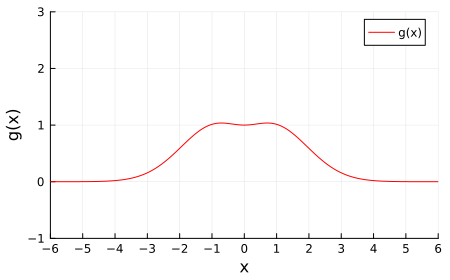

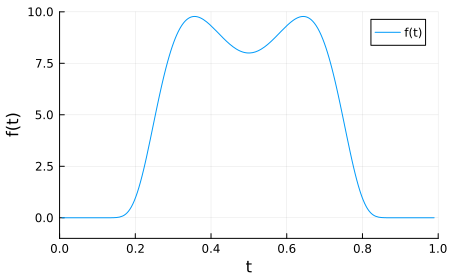

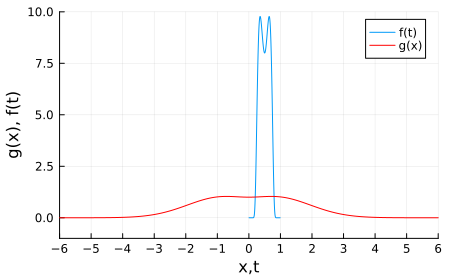

In [4]:
# solution to homwork 1, part I

using Random, Plots, Interact

g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
x(t) = (2*t-1) / (t-t^2)                          # variable transformation
J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)              # Jacobian

f(t) = g(x(t))*J(t)


plot(g, xticks=-6:1:6, xlim=[-6,6], ylim=[-1,3], size=(450, 280), 
     label="g(x)", xlabel="x", ylabel="g(x)", linecolor= :red) |> display


plot(f, xticks=0:0.2:1, xlim=[0,1], ylim=[-1,10], size=(450, 280), 
     label="f(t)", xlabel="t", ylabel="f(t)") |> display


plot!(g, xticks=-6:1:6, xlim=[-6,6], ylim=[-1,10], size=(450, 280), 
     label="g(x)", xlabel="x,t", ylabel="g(x), f(t)", linecolor = :red) 

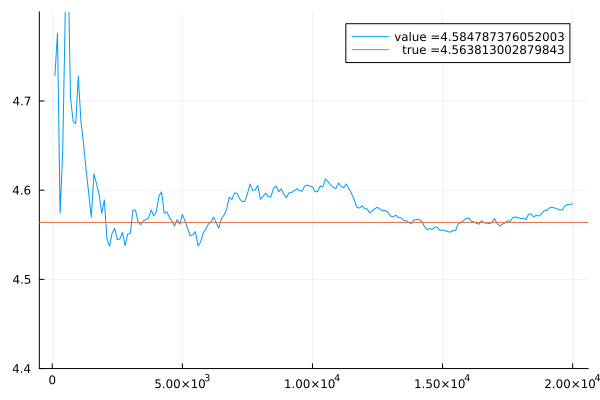

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["grid"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\pupss\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\pupss\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\pupss\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\pupss\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\pupss\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000082267c20, Task (runnable) @0x0000000082267c20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\"

In [5]:
# solution to homework 1, part II

g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
x(t) = (2*t-1) / (t-t^2)                          # variable transformation
J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)              # Jacobian

f(t) = g(x(t))*J(t)

every = 100
n_end = 20000

n_start = every

res_Rand = zeros(Int((n_end-n_start)/every) + 1)

for n in n_start:every:n_end             # better use RNG
    draw_list = rand(Xoshiro(123), n)    # short-hand for rand(Uniform(0,1), n)
    # draw_list = rand(n)                # this has chatters; inferior. Why?
    res = sum(f.(draw_list)) / n
    res_Rand[Int((n-n_start)/every) + 1] = res
end

n = [n_start:every:n_end;]
plot(n, res_Rand, ylimit=[4.4, 4.8], label="value =$(res_Rand[end])") 
hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") |> display


allgrids = Int(n_end/every)

@manipulate for grid in 1:allgrids 
    n1   = n[1:grid]  # the max of grid is allgrids
    res1 = res_Rand[1:grid]
    plot(n1, res1, ylimit=[4.4, 4.8], label="value =$(res1[end])")
    hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843")
end